In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
sns.set_style('whitegrid')

In [6]:
df = pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [7]:
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [9]:
df.shape

(1000, 11)

In [10]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.drop(columns= 'Unnamed: 0', inplace = True)

In [13]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [14]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df = df.dropna().reset_index(drop=True)

In [17]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,40,male,3,own,little,little,3857,30,car,good
520,23,male,2,free,little,little,1845,45,radio/TV,bad


In [18]:
df['Risk'].value_counts()

Risk
good    291
bad     231
Name: count, dtype: int64

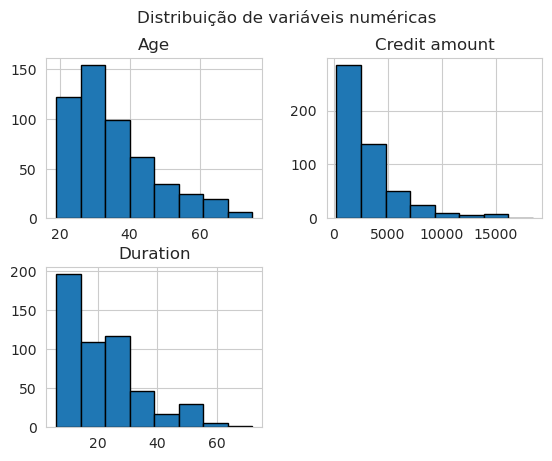

In [19]:
df[["Age", "Credit amount", "Duration"]].hist(bins = 8, edgecolor = 'black')
plt.suptitle("Distribuição de variáveis numéricas")
plt.show()

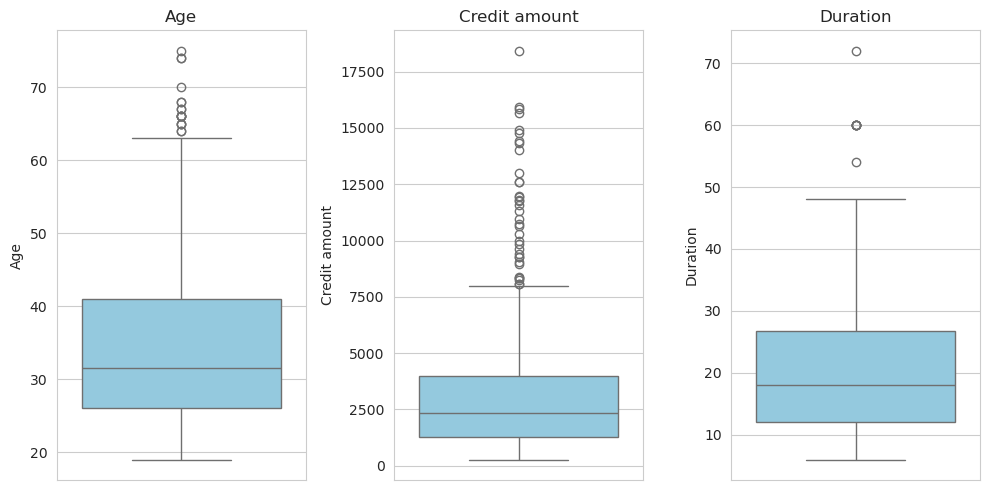

In [20]:
plt.figure(figsize=(10,5))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
  plt.subplot(1, 3, i+1)
  sns.boxplot(y=df[col], color='skyblue')
  plt.title(col)
plt.tight_layout()
plt.show()

In [21]:
df.query("Duration >= 50")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
54,58,male,2,rent,little,moderate,15945,54,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [22]:
categorical_col = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

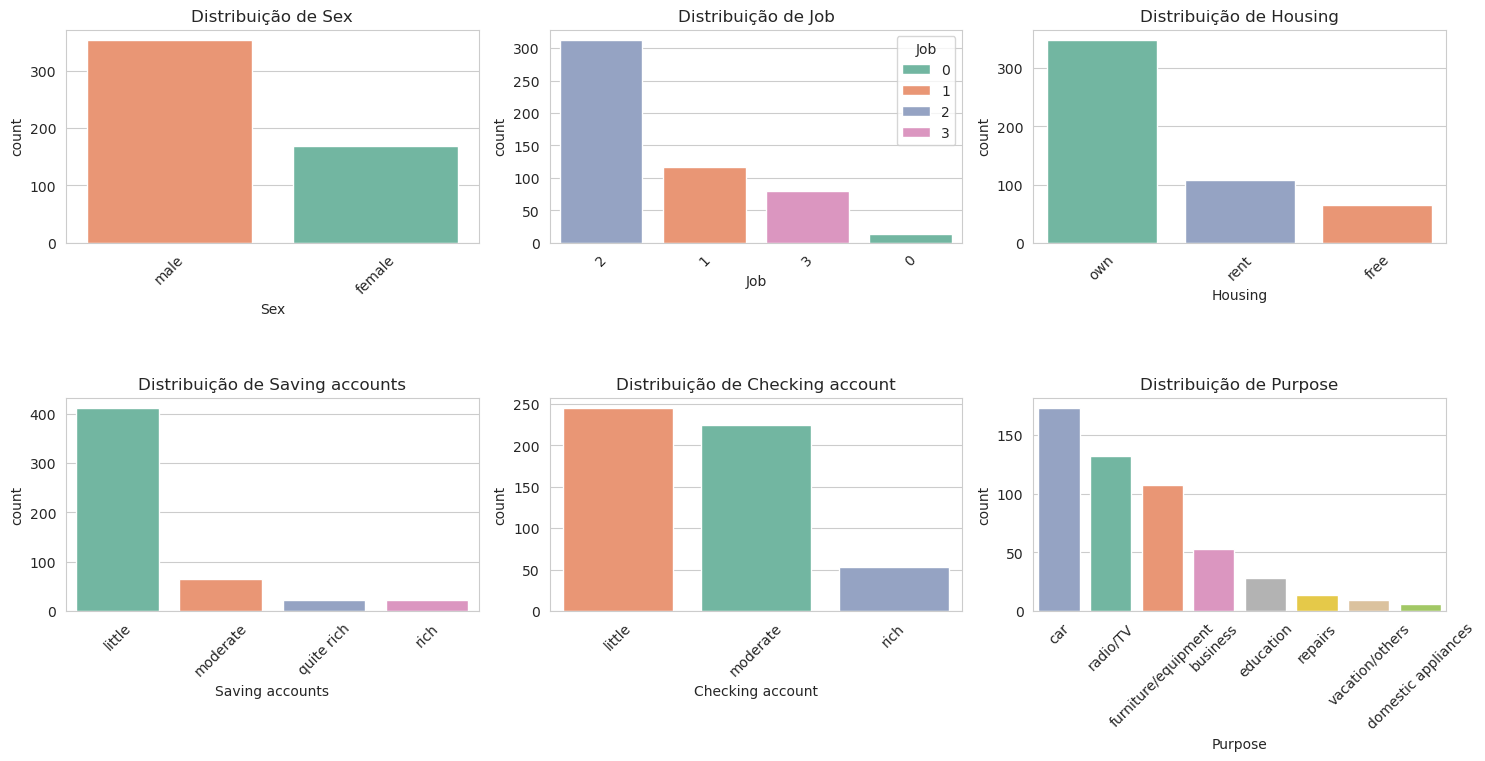

In [23]:
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_col):
  plt.subplot(3, 3, i+1)
  sns.countplot(data= df, x= col,hue=col, palette= "Set2", order=df[col].value_counts().index)
  plt.title(f"Distribuição de {col}")
  plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [24]:
corr = df[["Age", "Job", "Credit amount", "Duration"]].corr()

In [25]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


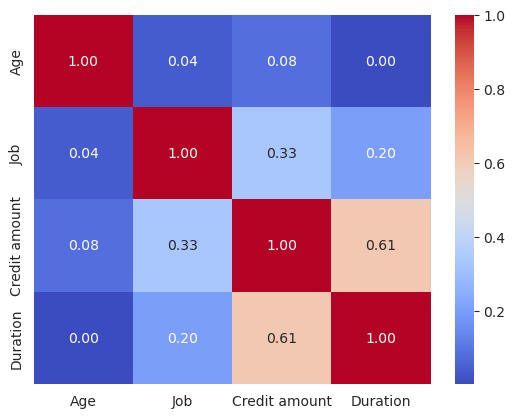

In [26]:
sns.heatmap(corr, annot= True, cmap= "coolwarm", fmt = ".2f")
plt.show()

In [27]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [28]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [29]:
pd.pivot_table(data= df, values= "Credit amount", index="Housing", columns = "Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


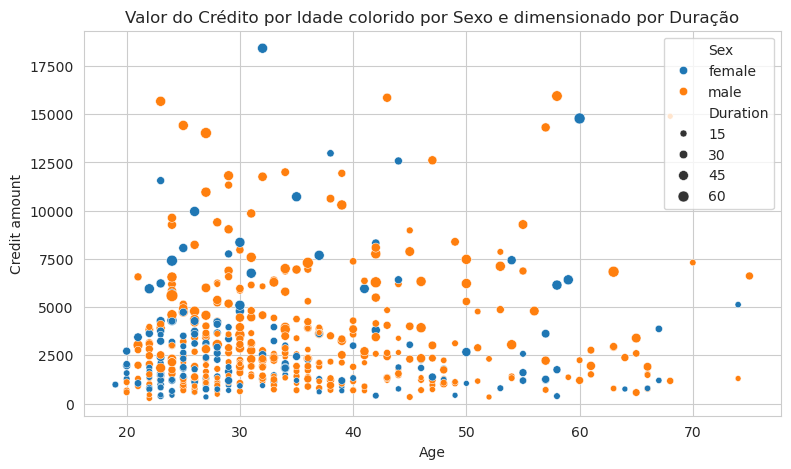

In [30]:
plt.figure(figsize=(9,5))
sns.scatterplot(data= df, x="Age", y="Credit amount", hue= "Sex", size = "Duration")
plt.title("Valor do Crédito por Idade colorido por Sexo e dimensionado por Duração")
plt.show()

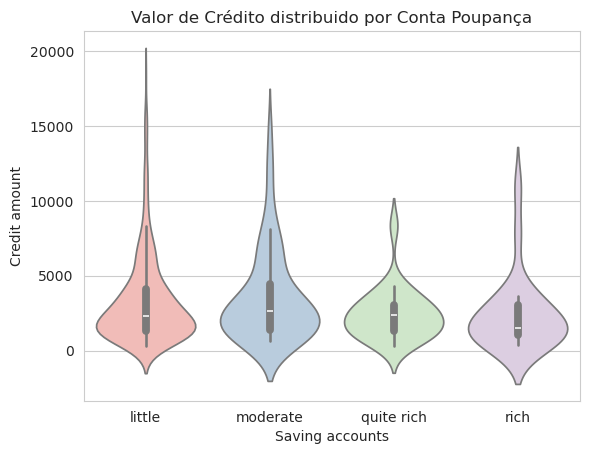

In [31]:
sns.violinplot(data=df, x="Saving accounts", y= "Credit amount",hue= "Saving accounts", palette="Pastel1")
plt.title("Valor de Crédito distribuido por Conta Poupança")
plt.show()


In [32]:
df['Risk'].value_counts(normalize= True) *100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

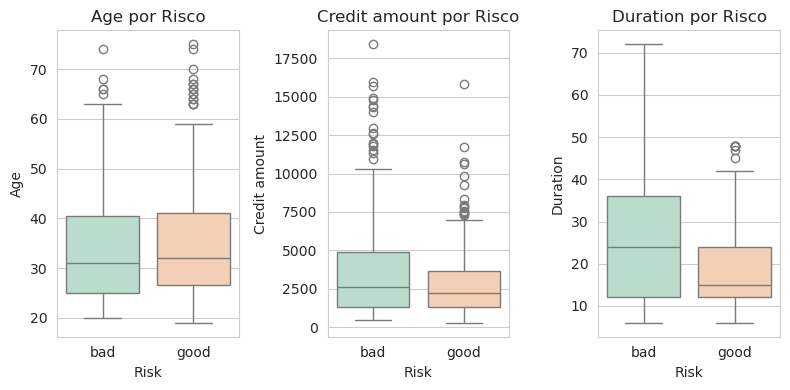

In [33]:
plt.figure(figsize=(8,4))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
  plt.subplot(1,3,i+1)
  sns.boxplot(df, x= "Risk", y=col, palette="Pastel2")
  plt.title(f"{col} por Risco")
plt.tight_layout()
plt.show()

In [34]:
df.groupby("Risk")[["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


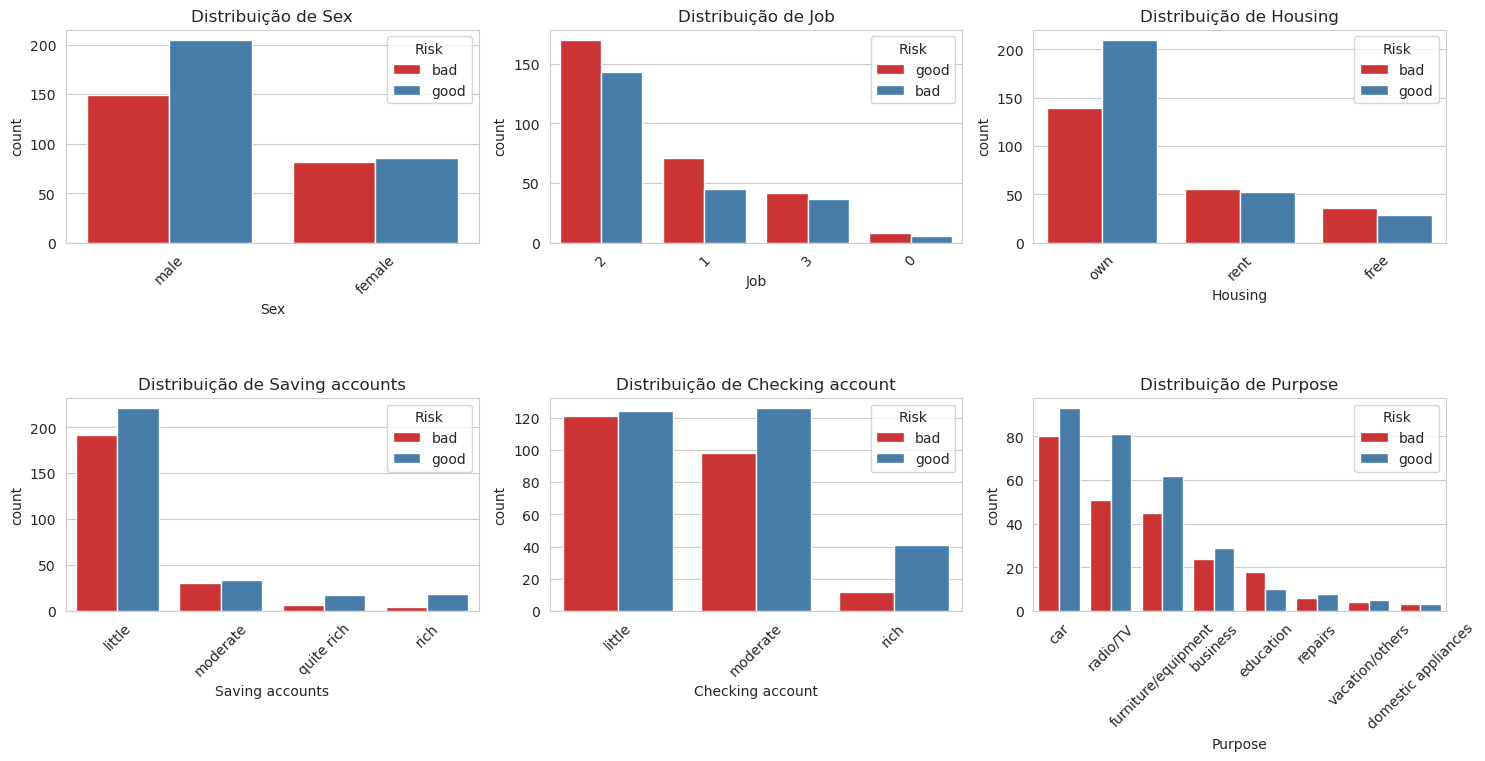

In [35]:
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_col):
  plt.subplot(3, 3, i+1)
  sns.countplot(data= df, x= col,hue="Risk", palette= "Set1", order=df[col].value_counts().index)
  plt.title(f"Distribuição de {col}")
  plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [36]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [37]:
features = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration']


In [38]:
target = "Risk"

In [39]:
df_model = df[features+[target]].copy()

In [40]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               522 non-null    int64 
 1   Sex               522 non-null    object
 2   Job               522 non-null    int64 
 3   Housing           522 non-null    object
 4   Saving accounts   522 non-null    object
 5   Checking account  522 non-null    object
 6   Credit amount     522 non-null    int64 
 7   Duration          522 non-null    int64 
 8   Risk              522 non-null    object
dtypes: int64(4), object(5)
memory usage: 36.8+ KB


In [41]:
df_model

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad
...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,good
518,30,male,3,own,little,little,3959,36,good
519,40,male,3,own,little,little,3857,30,good
520,23,male,2,free,little,little,1845,45,bad


In [42]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [43]:
cat_cols = df_model.select_dtypes(include = "object").columns.drop("Risk")
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [44]:
le_dict ={}

In [45]:
for col in cat_cols:
  le = LabelEncoder()
  df_model[col] = le.fit_transform(df_model[col])
  le_dict[col] = le
  joblib.dump(le, f"{col}_encoder.pkl")

In [46]:
le_target = LabelEncoder()

In [47]:
df_model[target] = le_target.fit_transform(df_model[target])

In [48]:
df_model[target]

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [49]:
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [50]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = df_model.drop(target, axis=1)

In [53]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [54]:
y = df_model[target]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1 )

In [56]:
print(X_train.shape)
print(X_test.shape)

(417, 8)
(105, 8)


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [59]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, param_grid, cv = 5, scoring= "accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return best_model, acc, grid.best_params_

# Decision Tree #


In [60]:
dt = DecisionTreeClassifier(random_state= 1, class_weight = "balanced")
dt_param_grid ={
    "max_depth" : [3,5,7,10, None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [61]:
best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)

In [62]:
print("Decision Tree Accuracy", acc_dt)

Decision Tree Accuracy 0.580952380952381


In [63]:
print("Best Parameters: ", params_dt)

Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


# Random Forest

In [64]:
rf = RandomForestClassifier(random_state=1, class_weight= "balanced", n_jobs=-1)

In [73]:
rf_param_grid = {
    "n_estimators": [100,200],
    "max_depth" : [ 5, 7, 10, None],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [70]:
best_fr, acc_rf, params_rf = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

In [71]:
print("Accuracy random forest: ", acc_rf)

Accuracy random forest:  0.6190476190476191


In [72]:
print("Best parameters: ", params_rf)

Best parameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


# Extra Tree


In [74]:
et = ExtraTreesClassifier(random_state=1, class_weight= "balanced", n_jobs=-1)

In [75]:
et_param_grid = {
    "n_estimators": [100,200],
    "max_depth" : [ 5, 7, 10, None],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [78]:
best_et, acc_et, param_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

In [79]:
print("Extra Tree accuracy", acc_et)

Extra Tree accuracy 0.6476190476190476


In [80]:
print("Extra tree parameters", param_et)

Extra tree parameters {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


# Xboost


In [81]:
xgb = XGBClassifier(random_state =1, scale_pos_weight = (y_train == 0).sum() / (y_train==1).sum(), use_label_encoder = False, eval_metric = "logloss")

In [82]:
xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 1],
    "colsample_bytree": [0.7, 1]
}

In [83]:
best_xgb, acc_xgb, param_xgb = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)

In [84]:
print("Accuracy Xgb", acc_xgb)

Accuracy Xgb 0.6952380952380952


In [85]:
print("XGB Best parameters", param_xgb)

XGB Best parameters {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}


In [86]:
best_xgb.predict(X_test)

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [87]:
joblib.dump(best_xgb, "xgb_credit_model.pkl")

['xgb_credit_model.pkl']